In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Exploration

In [3]:
directory = os.getcwd()
df = pd.read_excel(directory + "\\online_retail_II.xlsx", sheet_name = 0)
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


## Considerations:
1. Customer ID has a significant number of missing values
2. InvoiceDate already has the correct data type

In [6]:
df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,525461.000000,525461,525461.000000,417534.000000
mean,10.337667,2010-06-28 11:37:36.845017856,4.688834,15360.645478
min,-9600.000000,2009-12-01 07:45:00,-53594.360000,12346.000000
25%,1.000000,2010-03-21 12:20:00,1.250000,13983.000000
50%,3.000000,2010-07-06 09:51:00,2.100000,15311.000000
75%,10.000000,2010-10-15 12:45:00,4.210000,16799.000000
max,19152.000000,2010-12-09 20:01:00,25111.090000,18287.000000
std,107.424110,NaN,146.126914,1680.811316


## Considerations:
1. min(Quantity) and min(Price) are negative

In [8]:
df.describe(include = 'O')

,Invoice,StockCode,Description,Country
count,525461,525461,522533,525461
unique,28816,4632,4681,40
top,537434,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
freq,675,3516,3549,485852


In [9]:
# Investigating missing values of Customer IDs
df[df['Customer ID'].isna()].head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
263,489464,21733,85123a mixed,-96,2009-12-01 10:52:00,0.00,NaN,United Kingdom
283,489463,71477,short,-240,2009-12-01 10:52:00,0.00,NaN,United Kingdom
284,489467,85123A,21733 mixed,-192,2009-12-01 10:53:00,0.00,NaN,United Kingdom
470,489521,21646,NaN,-50,2009-12-01 11:44:00,0.00,NaN,United Kingdom
577,489525,85226C,BLUE PULL BACK RACING CAR,1,2009-12-01 11:49:00,0.55,NaN,United Kingdom


## Considerations:
1. It's really hard to get the actual Customer ID if it's missing (even if the transaction seems legit), so this data will be excluded from the analysis

In [11]:
# Investigating negative quantities
df[df['Quantity'] < 0].head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.0,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.0,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.0,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.0,Australia


From the variables description in the dataset, it's clear that the letter 'C' at the beginning of the invoice indicates a cancellation

In [13]:
# Investigating invoice types
df['Invoice'] = df['Invoice'].astype('str')
df[df['Invoice'].str.match('^\\d{6}$') == False] # Regex: matching exactly 6 digits

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.0,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.0,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.0,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
...,...,...,...,...,...,...,...,...
524695,C538123,22956,36 FOIL HEART CAKE CASES,-2,2010-12-09 15:41:00,2.10,12605.0,Germany
524696,C538124,M,Manual,-4,2010-12-09 15:43:00,0.50,15329.0,United Kingdom
524697,C538124,22699,ROSES REGENCY TEACUP AND SAUCER,-1,2010-12-09 15:43:00,2.95,15329.0,United Kingdom
524698,C538124,22423,REGENCY CAKESTAND 3 TIER,-1,2010-12-09 15:43:00,12.75,15329.0,United Kingdom


In [14]:
# Are there any other letter than the 'C'?
df['Invoice'].replace('[0-9]', '', regex = True).unique() # Regex: replacing all digits with an empty string

array(['', 'C', 'A'], dtype=object)

In [15]:
# Investigating the 'A'
df[df['Invoice'].str.startswith('A')]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
179403,A506401,B,Adjust bad debt,1,2010-04-29 13:36:00,-53594.36,NaN,United Kingdom
276274,A516228,B,Adjust bad debt,1,2010-07-19 11:24:00,-44031.79,NaN,United Kingdom
403472,A528059,B,Adjust bad debt,1,2010-10-20 12:04:00,-38925.87,NaN,United Kingdom


These transactions seem to be accounting operations and they are very few, so they'll be removed

Moving to the 'StockCode', from the variables description in the dataset it should a 5 digits code. Let's be sure about that

In [18]:
df['StockCode'] = df['StockCode'].astype('str')
df[df['StockCode'].str.match('^\\d{5}$') == False]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
12,489436,48173C,DOOR MAT BLACK FLOCK,10,2009-12-01 09:06:00,5.95,13078.0,United Kingdom
23,489436,35004B,SET OF 3 BLACK FLYING DUCKS,12,2009-12-01 09:06:00,4.65,13078.0,United Kingdom
28,489436,84596F,SMALL MARSHMALLOWS PINK BOWL,8,2009-12-01 09:06:00,1.25,13078.0,United Kingdom
...,...,...,...,...,...,...,...,...
525387,538170,84029E,RED WOOLLY HOTTIE WHITE HEART.,2,2010-12-09 19:32:00,3.75,13969.0,United Kingdom
525388,538170,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,2,2010-12-09 19:32:00,3.75,13969.0,United Kingdom
525389,538170,85232B,SET OF 3 BABUSHKA STACKING TINS,2,2010-12-09 19:32:00,4.95,13969.0,United Kingdom
525435,538171,47591D,PINK FAIRY CAKE CHILDRENS APRON,1,2010-12-09 20:01:00,1.95,17530.0,United Kingdom


There appear to be letters after 5 digits. These transactions appear to be legit, but I am investigating into these letters since they're not mentioned in the dataset description

In [20]:
# Regex: 5 digits followed by letters eventually repeated
unique_codes = df[(df['StockCode'].str.match('^\\d{5}$') == False) & (df['StockCode'].str.match('^\\d{5}[a-zA-Z]+$') == False)]['StockCode'].unique()
for code in unique_codes:
    filtered_df = df[df['StockCode'].str.contains(f'^{code}')]
    print(f"StockCode '{code}':")
    print(filtered_df.head())
    print("\n")

StockCode 'POST':
     Invoice StockCode Description  Quantity         InvoiceDate   Price  \
89    489439      POST     POSTAGE         3 2009-12-01 09:28:00   18.00   
126   489444      POST     POSTAGE         1 2009-12-01 09:55:00  141.00   
173   489447      POST     POSTAGE         1 2009-12-01 10:10:00  130.00   
625   489526      POST     POSTAGE         6 2009-12-01 11:50:00   18.00   
927  C489538      POST     POSTAGE        -1 2009-12-01 12:18:00    9.58   

     Customer ID         Country  
89       12682.0          France  
126      12636.0             USA  
173      12362.0         Belgium  
625      12533.0         Germany  
927      15796.0  United Kingdom  


StockCode 'D':
      Invoice StockCode        Description  Quantity         InvoiceDate  \
735   C489535         D           Discount        -1 2009-12-01 12:11:00   
736   C489535         D           Discount        -1 2009-12-01 12:11:00   
2377   489597  DCGS0058   MISO PRETTY  GUM         1 2009-12-01 14:28:

## Summary:
| Stock Code          | Description                                                            | Action                  |
|---------------------|------------------------------------------------------------------------|-------------------------|
| DCGS               | Looks valid, some quantities are negative though and customer ID is null | Exclude |
| D                  | Looks valid, represents discount values                                | Exclude  |
| DOT                | Looks valid, represents postage charges                                | Exclude  |
| M or m             | Looks valid, represents manual transactions                            | Exclude  |
| C2                 | Carriage transaction - not sure what this means                        | Exclude  |
| C3                 | Not sure, only 1 transaction                                           | Exclude                 |
| BANK CHARGES or B  | Bank charges                                                           | Exclude  |
| S                  | Samples sent to customer                                               | Exclude  |
| TESTXXX            | Testing data, not valid                                                | Exclude  |
| gift__XXX          | Purchases with gift cards, might be interesting for another analysis, but no customer data | Exclude |
| PADS               | Looks like a legit stock code for padding                              | Include                 |
| SP1002             | Looks like a special request item, only 2 transactions, 3 look legit, 1 has 0 pricing | Exclude |
| AMAZONFEE          | Looks like fees for Amazon shipping or something                       | Exclude  |
| ADJUSTX            | Looks like manual account adjustments by admins                        | Exclude  |

# Data Cleaning

In [23]:
clean_df = df.copy()

In [24]:
clean_df['Invoice'] = clean_df['Invoice'].astype('str')
mask = (
    clean_df['Invoice'].str.match('^\\d{6}$') == True
)
clean_df = clean_df[mask]
clean_df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom


In [25]:
clean_df["StockCode"] = clean_df["StockCode"].astype("str")
'''
I want StockCodes with 5 digits, or 5 digits followed by letters, or 'PADS' StockCodes as declared previously
'''
mask = (
    (clean_df["StockCode"].str.match("^\\d{5}$") == True)
    | (clean_df["StockCode"].str.match("^\\d{5}[a-zA-Z]+$") == True)
    | (clean_df["StockCode"].str.match("^PADS$") == True)
)
clean_df = clean_df[mask]
clean_df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom


In [26]:
clean_df.dropna(subset = ['Customer ID'], inplace=True)

C:\Users\pedre\AppData\Local\Temp\ipykernel_17300\438498976.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df.dropna(subset = ['Customer ID'], inplace=True)


In [27]:
clean_df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,406337.000000,406337,406337.000000,406337.000000
mean,13.619099,2010-07-01 10:11:06.543288320,2.991462,15373.632992
min,1.000000,2009-12-01 07:45:00,0.000000,12346.000000
25%,2.000000,2010-03-26 14:01:00,1.250000,14004.000000
50%,5.000000,2010-07-09 15:48:00,1.950000,15326.000000
75%,12.000000,2010-10-14 17:09:00,3.750000,16814.000000
max,19152.000000,2010-12-09 20:01:00,295.000000,18287.000000
std,97.000659,NaN,4.285876,1677.365907


## Considerations:
The negative prices have been fixed as well as negative quantity. There are prices = 0

In [29]:
clean_df[clean_df['Price'] == 0]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
4674,489825,22076,6 RIBBONS EMPIRE,12,2009-12-02 13:34:00,0.0,16126.0,United Kingdom
6781,489998,48185,DOOR MAT FAIRY CAKE,2,2009-12-03 11:19:00,0.0,15658.0,United Kingdom
18738,490961,22065,CHRISTMAS PUDDING TRINKET POT,1,2009-12-08 15:25:00,0.0,14108.0,United Kingdom
18739,490961,22142,CHRISTMAS CRAFT WHITE FAIRY,12,2009-12-08 15:25:00,0.0,14108.0,United Kingdom
32916,492079,85042,ANTIQUE LILY FAIRY LIGHTS,8,2009-12-15 13:49:00,0.0,15070.0,United Kingdom
40101,492760,21143,ANTIQUE GLASS HEART DECORATION,12,2009-12-18 14:22:00,0.0,18071.0,United Kingdom
47126,493761,79320,FLAMINGO LIGHTS,24,2010-01-06 14:54:00,0.0,14258.0,United Kingdom
48342,493899,22355,"CHARLOTTE BAG , SUKI DESIGN",10,2010-01-08 10:43:00,0.0,12417.0,Belgium
57619,494607,21533,RETRO SPOT LARGE MILK JUG,12,2010-01-15 12:43:00,0.0,16858.0,United Kingdom
111348,500073,21662,VINTAGE GLASS COFFEE CADDY,1,2010-03-04 11:44:00,0.0,13047.0,United Kingdom


0 prices items should not be included in my analysis since they're probably gifts or something like that

In [31]:
clean_df = clean_df[clean_df['Price'] > 0]
clean_df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,406309.000000,406309,406309.000000,406309.000000
mean,13.617924,2010-07-01 10:14:25.869572352,2.991668,15373.722268
min,1.000000,2009-12-01 07:45:00,0.001000,12346.000000
25%,2.000000,2010-03-26 14:01:00,1.250000,14006.000000
50%,5.000000,2010-07-09 15:48:00,1.950000,15326.000000
75%,12.000000,2010-10-14 17:09:00,3.750000,16814.000000
max,19152.000000,2010-12-09 20:01:00,295.000000,18287.000000
std,96.998833,NaN,4.285951,1677.329470


There is a really small price, but I think it is okay

## Data Cleaning summary
How much data we still have after the Data Cleaning step?

In [34]:
print(str((len(clean_df) / len(df)) * 100) + '%')

77.32429238325965%


# Feature Engineering

In [36]:
clean_df = clean_df.copy()
clean_df[ 'SalesTotal'] = clean_df['Quantity'] * clean_df['Price']
clean_df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,SalesTotal
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0


In [37]:
agg_df = clean_df.groupby('Customer ID', as_index = False).agg(
    Total = ('SalesTotal', 'sum'),
    Frequency = ('Invoice', 'nunique'),
    LastInvoiceDate = ('InvoiceDate', 'max')
)
agg_df.head()

,Customer ID,Total,Frequency,LastInvoiceDate
0,12346.0,169.36,2,2010-06-28 13:53:00
1,12347.0,1323.32,2,2010-12-07 14:57:00
2,12348.0,221.16,1,2010-09-27 14:59:00
3,12349.0,2221.14,2,2010-10-28 08:23:00
4,12351.0,300.93,1,2010-11-29 15:23:00


In [38]:
max_invoice_date = agg_df['LastInvoiceDate'].max()
agg_df['Recency'] = (max_invoice_date - agg_df['LastInvoiceDate']).dt.days
agg_df.head()

,Customer ID,Total,Frequency,LastInvoiceDate,Recency
0,12346.0,169.36,2,2010-06-28 13:53:00,164
1,12347.0,1323.32,2,2010-12-07 14:57:00,2
2,12348.0,221.16,1,2010-09-27 14:59:00,73
3,12349.0,2221.14,2,2010-10-28 08:23:00,42
4,12351.0,300.93,1,2010-11-29 15:23:00,10


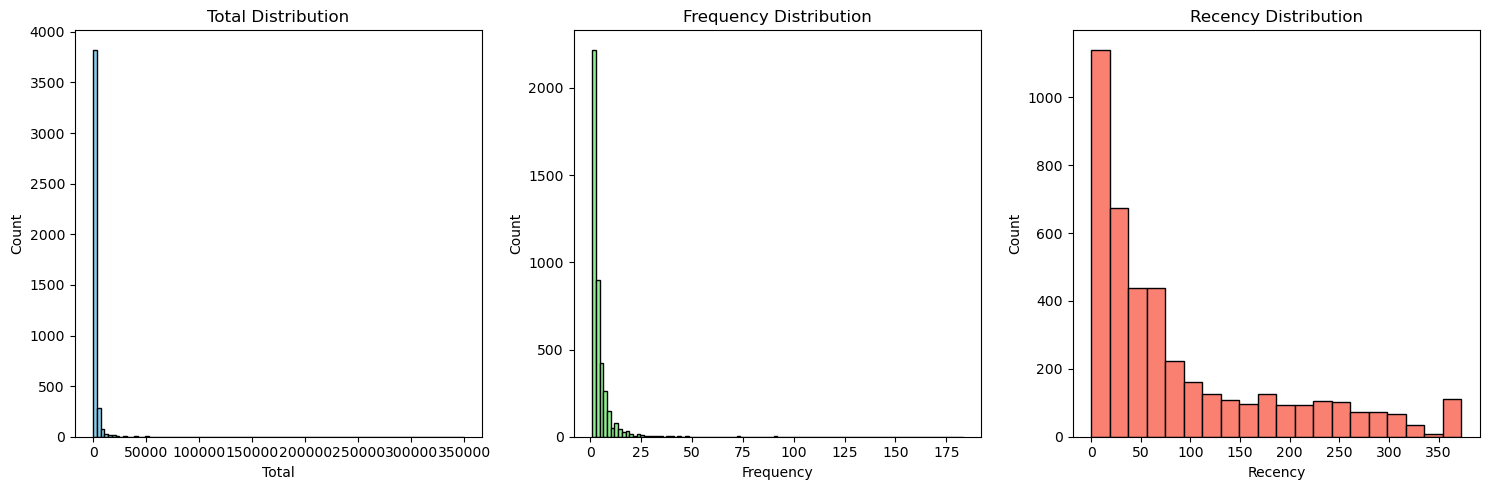

In [39]:
# Are there any outliers? They may affect the clustering
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(agg_df['Total'], bins=100, color='skyblue', edgecolor='black')
plt.title('Total Distribution')
plt.xlabel('Total')
plt.ylabel('Count')

plt.subplot(1, 3, 2)
plt.hist(agg_df['Frequency'], bins=100, color='lightgreen', edgecolor='black')
plt.title('Frequency Distribution')
plt.xlabel('Frequency')
plt.ylabel('Count')

plt.subplot(1, 3, 3)
plt.hist(agg_df['Recency'], bins=20, color='salmon', edgecolor='black')
plt.title('Recency Distribution')
plt.xlabel('Recency')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

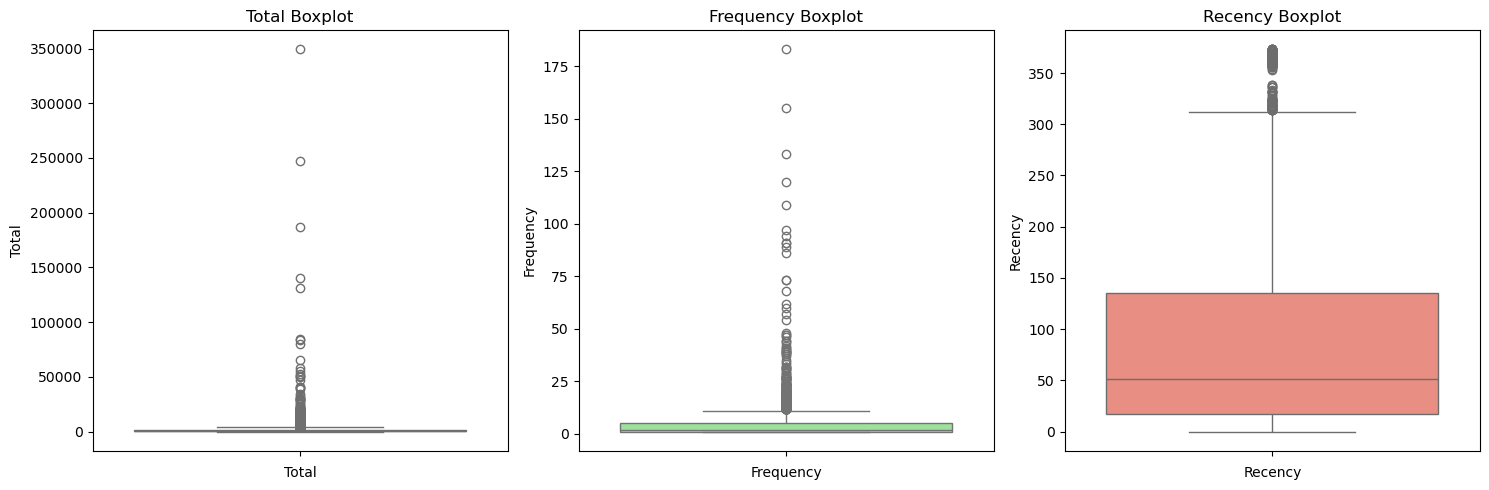

In [40]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(data = agg_df['Total'], color='skyblue')
plt.title('Total Boxplot')
plt.xlabel('Total')

plt.subplot(1, 3, 2)
sns.boxplot(data = agg_df['Frequency'], color='lightgreen')
plt.title('Frequency Boxplot')
plt.xlabel('Frequency')

plt.subplot(1, 3, 3)
sns.boxplot(data = agg_df['Recency'], color='salmon')
plt.title('Recency Boxplot')
plt.xlabel('Recency')

plt.tight_layout()
plt.show()

Few outliers in 'Recency', but many in 'Total' and 'Frequency'.

Since the outliers in the first two charts represent the most valuable clients, they should not be removed. I'll perform a separate analysis on them.

In [42]:
T_Q1 = agg_df['Total'].quantile(0.25)
T_Q3 = agg_df['Total'].quantile(0.75)
T_IQR = T_Q3 - T_Q1

# Quantile outlier definition
total_outliers = agg_df[(agg_df['Total'] > (T_Q3 + 1.5 * T_IQR)) | (agg_df['Total'] < (T_Q1 - 1.5 * T_IQR))].copy()
total_outliers.describe()

,Customer ID,Total,Frequency,LastInvoiceDate,Recency
count,423.000000,423.000000,423.000000,423,423.000000
mean,15103.040189,12188.101740,17.167849,2010-11-09 12:26:02.978723328,30.035461
min,12357.000000,3802.040000,1.000000,2009-12-10 18:03:00,0.000000
25%,13622.000000,4605.940000,8.000000,2010-11-08 13:17:30,3.000000
50%,14961.000000,6191.320000,12.000000,2010-11-26 12:19:00,13.000000
75%,16692.000000,10273.235000,18.000000,2010-12-06 10:34:30,31.000000
max,18260.000000,349164.350000,183.000000,2010-12-09 19:32:00,364.000000
std,1728.661406,25830.851045,19.729755,NaN,51.541004


In [43]:
F_Q1 = agg_df['Frequency'].quantile(0.25)
F_Q3 = agg_df['Frequency'].quantile(0.75)
F_IQR = F_Q3 - F_Q1
frequency_outliers = agg_df[(agg_df['Frequency'] > (F_Q3 + 1.5 * F_IQR)) | (agg_df['Frequency'] < (F_Q1 - 1.5 * F_IQR))].copy()
frequency_outliers.describe()

,Customer ID,Total,Frequency,LastInvoiceDate,Recency
count,279.000000,279.000000,279.000000,279,279.000000
mean,15352.655914,14409.714932,23.810036,2010-11-23 11:06:20.645161216,16.089606
min,12437.000000,1094.390000,12.000000,2010-05-12 16:51:00,0.000000
25%,13800.000000,4331.560500,13.000000,2010-11-20 13:14:30,2.000000
50%,15465.000000,6615.770000,17.000000,2010-12-02 10:46:00,7.000000
75%,16828.500000,11692.405000,23.000000,2010-12-07 11:08:30,19.000000
max,18260.000000,349164.350000,183.000000,2010-12-09 19:32:00,211.000000
std,1748.429987,31381.736785,21.932937,NaN,26.589117


In [44]:
# The Total and Frequency outliers may have values in common, so let's filter them out
non_outliers = agg_df[(~agg_df.index.isin(total_outliers.index)) & (~agg_df.index.isin(frequency_outliers.index))]
non_outliers.describe()

,Customer ID,Total,Frequency,LastInvoiceDate,Recency
count,3809.000000,3809.000000,3809.000000,3809,3809.000000
mean,15376.482804,885.502197,2.863481,2010-09-03 11:16:46.516146176,97.082174
min,12346.000000,1.550000,1.000000,2009-12-01 10:49:00,0.000000
25%,13912.000000,279.910000,1.000000,2010-07-08 14:48:00,22.000000
50%,15389.000000,588.050000,2.000000,2010-10-12 16:25:00,58.000000
75%,16854.000000,1269.050000,4.000000,2010-11-17 13:14:00,154.000000
max,18287.000000,3788.210000,11.000000,2010-12-09 20:01:00,373.000000
std,1693.199806,817.672283,2.243748,NaN,98.111495


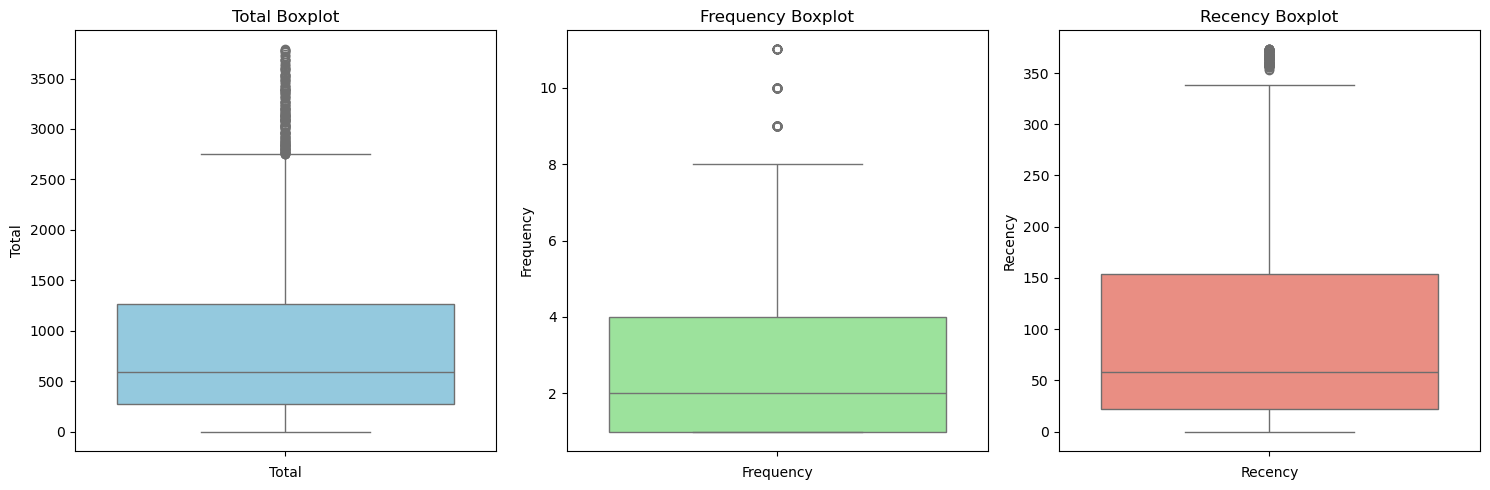

In [45]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(data = non_outliers['Total'], color='skyblue')
plt.title('Total Boxplot')
plt.xlabel('Total')

plt.subplot(1, 3, 2)
sns.boxplot(data = non_outliers['Frequency'], color='lightgreen')
plt.title('Frequency Boxplot')
plt.xlabel('Frequency')

plt.subplot(1, 3, 3)
sns.boxplot(data = non_outliers['Recency'], color='salmon')
plt.title('Recency Boxplot')
plt.xlabel('Recency')

plt.tight_layout()
plt.show()

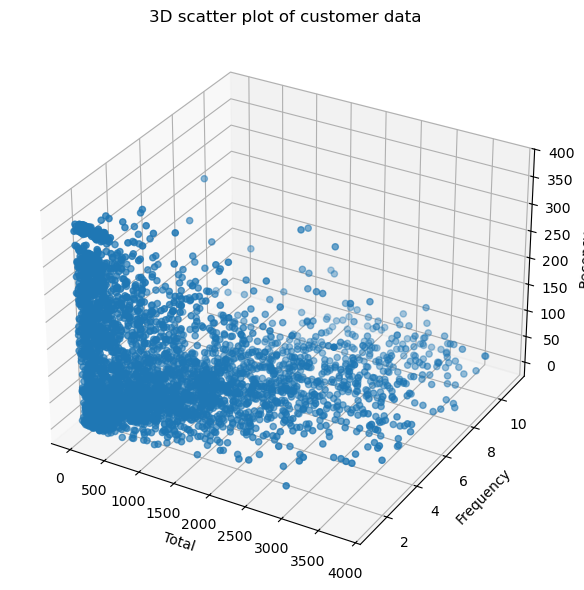

In [46]:
fig = plt.figure(figsize=(6, 6))

ax = fig.add_subplot(projection = '3d')
scatter = ax.scatter(non_outliers['Total'], non_outliers['Frequency'], non_outliers['Recency'])

ax.set_xlabel('Total')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')

ax.set_title('3D scatter plot of customer data')
plt.tight_layout()
plt.show()

It is clear the difference of scales. Indeed, 'Total' may have a bigger weight during clustering.

Standard scaling transforms the features of your data to have a mean of 0 and a standard deviation of 1, ensuring that each feature contributes equally to the analysis (assuming a normal distribution).


$$z = \frac{x - \mu}{\sigma}$$


Where:

- $ z $ is the standardized value,
- $ x $ is the original value,
- $ \mu $ is the mean of the feature,
- $ \sigma $ is the standard deviation of the feature.

In [48]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(non_outliers[['Total', 'Frequency', 'Recency']])
scaled_data_df = pd.DataFrame(scaled_data, index = non_outliers.index, columns=("Total", "Frequency", "Recency"))
scaled_data_df

,Total,Frequency,Recency
0,-0.875945,-0.384889,0.682149
1,0.535514,-0.384889,-0.969251
2,-0.812586,-0.830631,-0.245489
3,1.633678,-0.384889,-0.561498
4,-0.715016,-0.830631,-0.887700
...,...,...,...
4280,-0.298120,1.398076,-0.816344
4281,-0.579553,-0.830631,-0.316846
4282,-0.621972,-0.830631,2.017539
4283,0.441467,-0.384889,0.141876


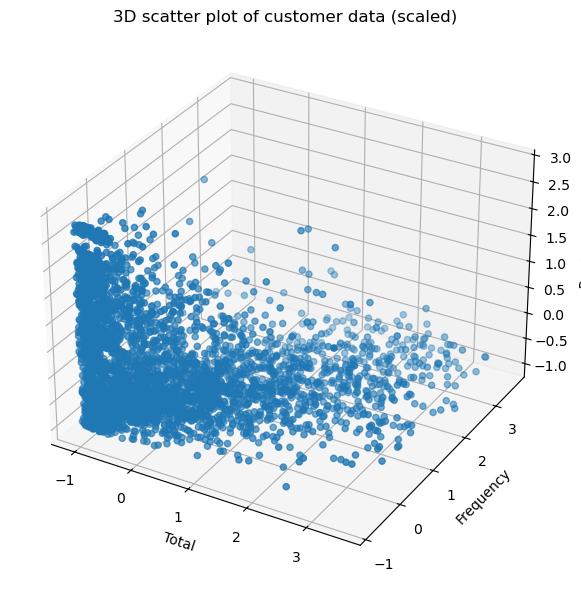

In [49]:
fig = plt.figure(figsize=(6, 6))

ax = fig.add_subplot(projection = '3d')
scatter = ax.scatter(scaled_data_df['Total'], scaled_data_df['Frequency'], scaled_data_df['Recency'])

ax.set_xlabel('Total')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')

ax.set_title('3D scatter plot of customer data (scaled)')
plt.tight_layout()
plt.show()

# KMeans Clustering

### Silhouette Score

$s(i) = \frac{b(i) - a(i)}{\max(a(i), b(i))}$

Where:
- $s(i)$ is the silhouette score for a single sample $i$,
- $a(i)$ is the average distance between $i$ and all other points in the same cluster,
- $b(i)$ is the minimum average distance between $i$ and all points in the nearest cluster to which $i$ does not belong.

The silhouette score ranges between $[-1, 1]$, where a higher value indicates more distinct clusters.

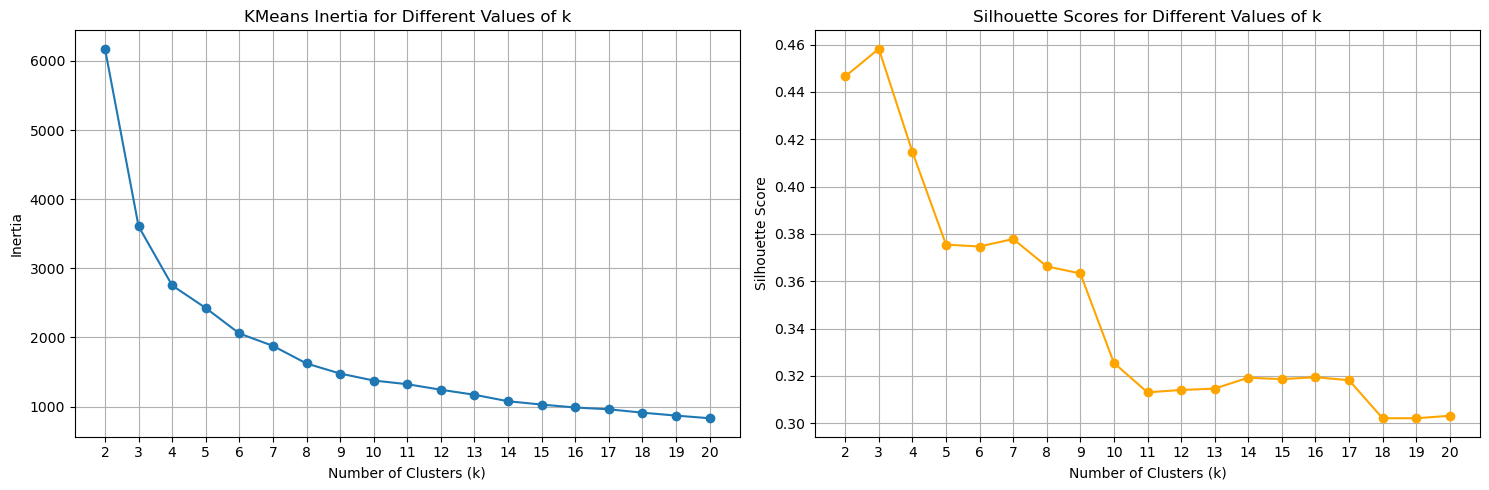

In [52]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Set the number of cores explicitly to avoid a warning
os.environ["LOKY_MAX_CPU_COUNT"] = "4"

max_k = 20
inertia = []
silhouette_scores = []
k_values = range(2, max_k + 1)

for k in k_values:
    kmeans = KMeans(n_clusters = k, random_state = 0, max_iter = 1000)
    cluster_labels = kmeans.fit_predict(scaled_data_df)
    
    # Calculate silhouette score
    sil_score = silhouette_score(scaled_data_df, cluster_labels)
    silhouette_scores.append(sil_score)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(15, 5))

# Inertia plot
plt.subplot(1, 2, 1)
plt.plot(k_values, inertia, marker = 'o')
plt.title('KMeans Inertia for Different Values of k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True)

# Silhouette score plot
plt.subplot(1, 2, 2)
plt.plot(k_values, silhouette_scores, marker = 'o', color = 'orange')
plt.title('Silhouette Scores for Different Values of k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(k_values)
plt.grid(True)

plt.tight_layout()
plt.show()

To apply the Helbow Method, we need to locate the Helbow of the Inertia function. The Silhouette Score tells us that the higher value is scored at k = 3. Therefore, at this value the clusters will be less overlapped. Also, it shown that further k values don't make the Inertia Score any higher

In [54]:
kmeans = KMeans(n_clusters = 3, random_state = 0, max_iter = 1000)
cluster_labels = kmeans.fit_predict(scaled_data_df)
cluster_labels

array([0, 2, 2, ..., 0, 2, 1])

In [55]:
non_outliers = non_outliers.copy()
non_outliers['Cluster'] = cluster_labels
non_outliers

,Customer ID,Total,Frequency,LastInvoiceDate,Recency,Cluster
0,12346.0,169.36,2,2010-06-28 13:53:00,164,0
1,12347.0,1323.32,2,2010-12-07 14:57:00,2,2
2,12348.0,221.16,1,2010-09-27 14:59:00,73,2
3,12349.0,2221.14,2,2010-10-28 08:23:00,42,1
4,12351.0,300.93,1,2010-11-29 15:23:00,10,2
...,...,...,...,...,...,...
4280,18283.0,641.77,6,2010-11-22 15:30:00,17,2
4281,18284.0,411.68,1,2010-10-04 11:33:00,66,2
4282,18285.0,377.00,1,2010-02-17 10:24:00,295,0
4283,18286.0,1246.43,2,2010-08-20 11:57:00,111,2


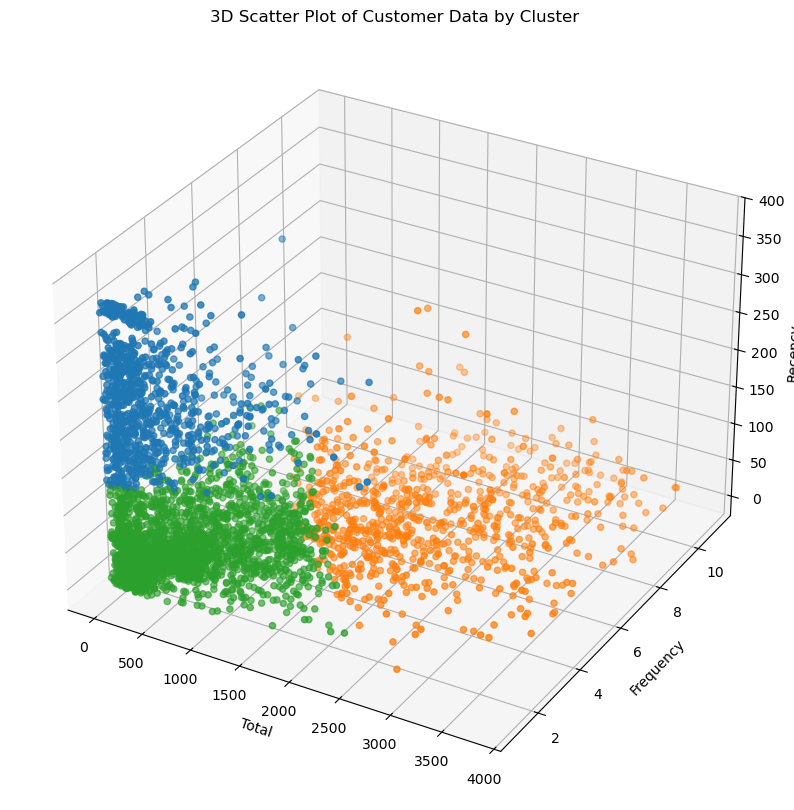

In [56]:
cluster_colors = {0: '#1f77b4',  # Blue
                  1: '#ff7f0e',  # Orange
                  2: '#2ca02c',  # Green
                 }
colors = non_outliers['Cluster'].map(cluster_colors)

fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot(projection = '3d')

scatter = ax.scatter(non_outliers['Total'], 
                     non_outliers['Frequency'], 
                     non_outliers['Recency'], 
                     c = colors,
                     marker = 'o')

ax.set_xlabel('Total')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')

ax.set_title('3D Scatter Plot of Customer Data by Cluster')

plt.show()

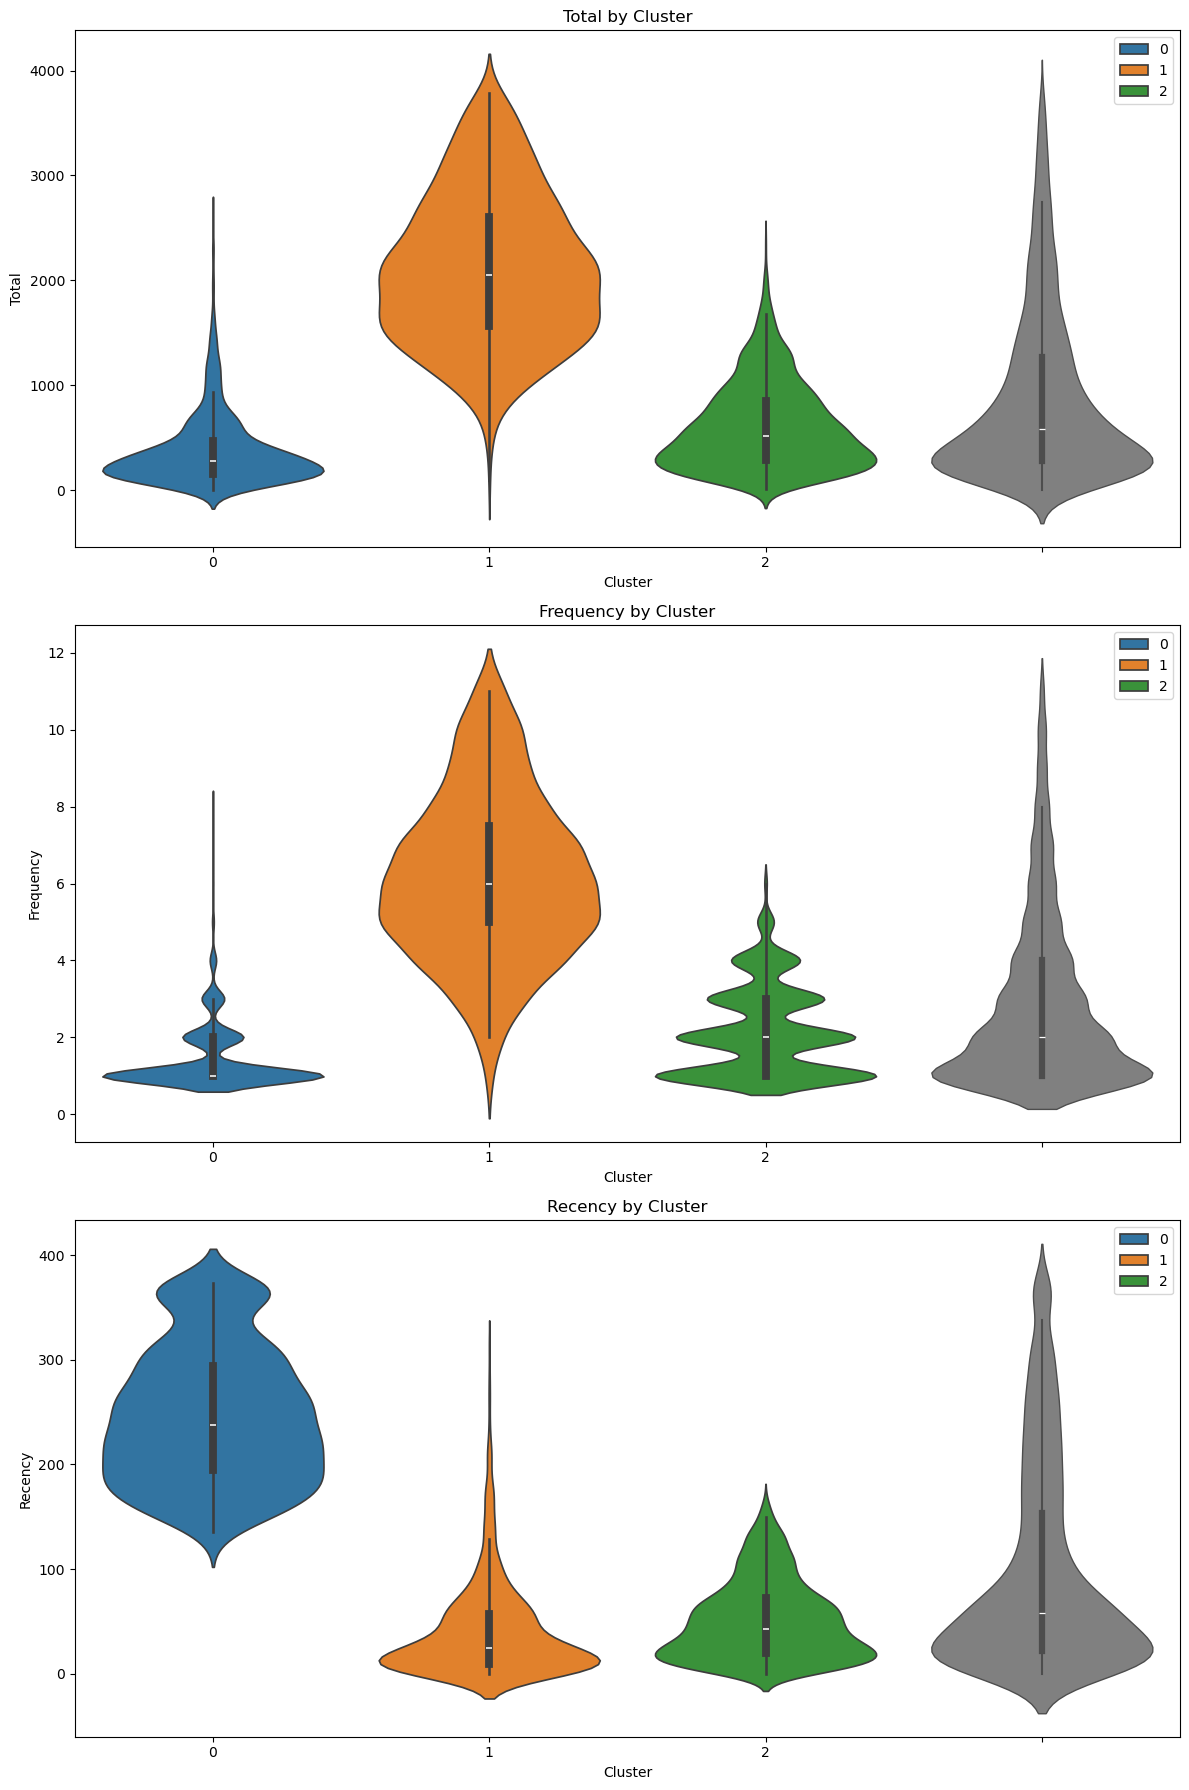

In [57]:
plt.figure(figsize = (12, 18))

plt.subplot(3, 1, 1)
sns.violinplot(x = non_outliers['Cluster'], y = non_outliers['Total'], palette = cluster_colors, hue = non_outliers["Cluster"])
sns.violinplot(y = non_outliers['Total'], color = 'gray', linewidth = 1.0) # Violin plot of all unclustered data
plt.title('Total by Cluster')
plt.ylabel('Total')

plt.subplot(3, 1, 2)
sns.violinplot(x = non_outliers['Cluster'], y = non_outliers['Frequency'], palette = cluster_colors, hue = non_outliers["Cluster"])
sns.violinplot(y = non_outliers['Frequency'], color =  'gray', linewidth = 1.0)
plt.title('Frequency by Cluster')
plt.ylabel('Frequency')


plt.subplot(3, 1, 3)
sns.violinplot(x = non_outliers['Cluster'], y = non_outliers['Recency'], palette = cluster_colors, hue = non_outliers["Cluster"])
sns.violinplot(y = non_outliers['Recency'], color = 'gray', linewidth = 1.0)
plt.title('Recency by Cluster')
plt.ylabel('Recency')

plt.tight_layout()
plt.show()

## Cluster Identification and Actions

### **Cluster 0 (Blue): "New Shoppers"**
- **Rationale**:  
  This cluster represents customers who purchase not very frequently, but very recently. They may be new customers who are exploring the products or services.  
- **Action**:  
  - Provide excellent customer service to make a positive first impression.  
  - Offer incentives such as discounts or promotions to encourage frequent purchases and build loyalty.

---

### **Cluster 1 (Orange): "Re-engage"**
- **Rationale**:  
  This cluster represents customers who were highly active in the past (frequent and high-value purchases) but have become inactive recently. They may have lost interest or been drawn away by competitors.  
- **Action**:  
  - Launch targeted marketing campaigns to regain their interest.  
  - Offer special discounts or personalized promotions to entice them back.  
  - Send reminders, newsletters, or product updates to keep your brand top of mind.

---

### **Cluster 2 (Green): "Reward"**
- **Rationale**:  
  This cluster represents your loyal, average customers. Their purchasing behavior aligns closely with the population mean, indicating consistent and reliable engagement over time.  
- **Action**:  
  - Implement a robust loyalty program to reward their commitment.  
  - Provide exclusive offers, early access to products, or recognition to reinforce their loyalty.  
  - Focus on keeping them satisfied to prevent churn.


## Outliers Clustering

In [60]:
# Find overlapping indices between total and frequency since we already know that they may overlap
overlap_indices = total_outliers.index.intersection(frequency_outliers.index)

# Separate outliers
total_only_outliers = total_outliers.drop(overlap_indices)
frequency_only_outliers = frequency_outliers.drop(overlap_indices)
total_and_frequency_outliers = total_outliers.loc[overlap_indices]

# Manually assign cluster labels
total_only_outliers['Cluster'] = -1 # Negative label to indicate that this has been done manually
frequency_only_outliers['Cluster'] = -2
total_and_frequency_outliers['Cluster'] = -3

outlier_clusters_df = pd.concat([total_only_outliers, frequency_only_outliers, total_and_frequency_outliers])
outlier_clusters_df

,Customer ID,Total,Frequency,LastInvoiceDate,Recency,Cluster
9,12357.0,11229.99,1,2010-11-16 10:05:00,23,-1
25,12380.0,4782.84,4,2010-08-31 14:54:00,100,-1
42,12409.0,12346.62,4,2010-10-15 10:24:00,55,-1
48,12415.0,19468.84,4,2010-11-29 15:07:00,10,-1
61,12431.0,4145.52,11,2010-12-01 10:03:00,8,-1
...,...,...,...,...,...,...
4235,18223.0,7516.31,12,2010-11-17 12:20:00,22,-3
4236,18225.0,7545.14,15,2010-12-09 15:46:00,0,-3
4237,18226.0,6650.83,15,2010-11-26 15:51:00,13,-3
4241,18231.0,4791.80,23,2010-10-29 14:17:00,41,-3


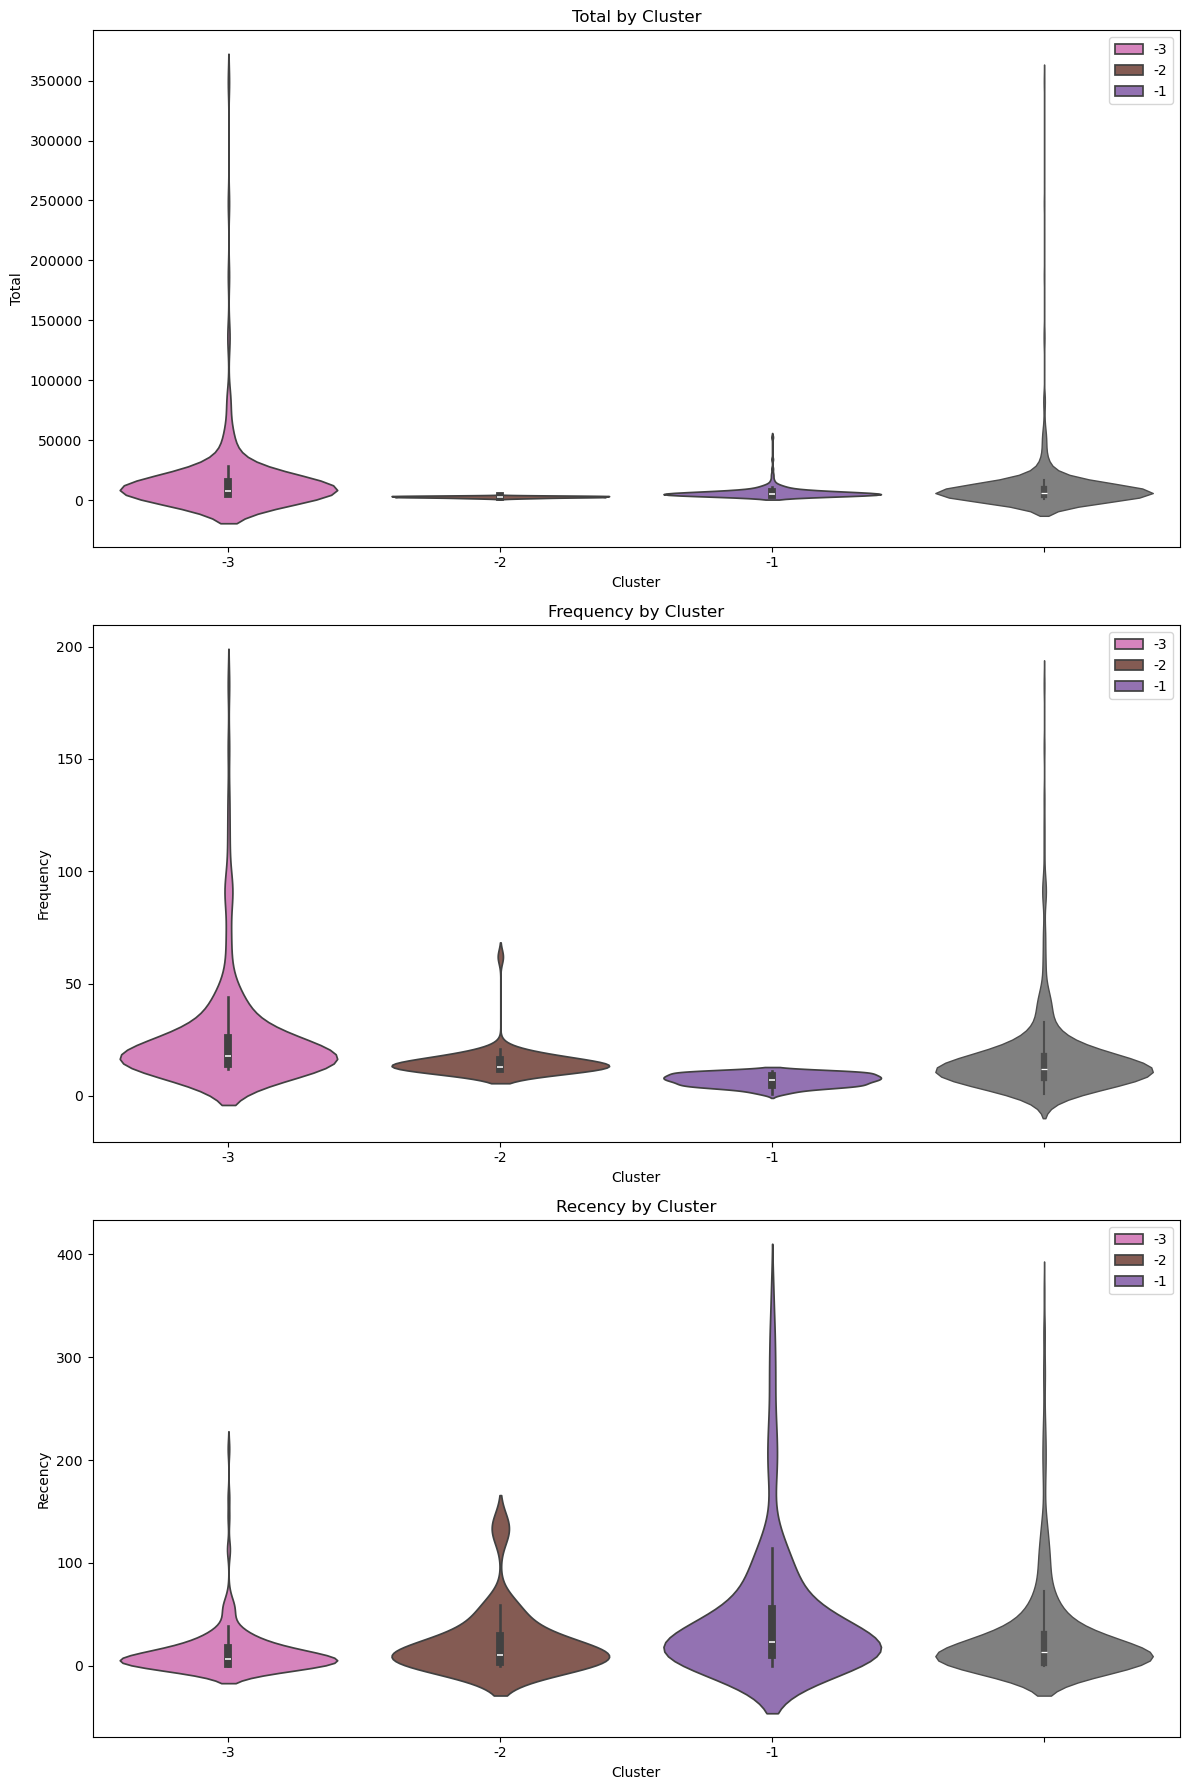

In [61]:
cluster_colors = {-1: '#9467bd',
                  -2: '#8c564b',
                  -3: '#e377c2'}

plt.figure(figsize = (12, 18))

plt.subplot(3, 1, 1)
sns.violinplot(x = outlier_clusters_df['Cluster'], y = outlier_clusters_df['Total'], palette = cluster_colors, hue = outlier_clusters_df["Cluster"])
sns.violinplot(y = outlier_clusters_df['Total'], color = 'gray', linewidth = 1.0) # Violin plot of all unclustered data
plt.title('Total by Cluster')
plt.ylabel('Total')

plt.subplot(3, 1, 2)
sns.violinplot(x = outlier_clusters_df['Cluster'], y = outlier_clusters_df['Frequency'], palette = cluster_colors, hue = outlier_clusters_df["Cluster"])
sns.violinplot(y = outlier_clusters_df['Frequency'], color =  'gray', linewidth = 1.0)
plt.title('Frequency by Cluster')
plt.ylabel('Frequency')


plt.subplot(3, 1, 3)
sns.violinplot(x = outlier_clusters_df['Cluster'], y = outlier_clusters_df['Recency'], palette = cluster_colors, hue = outlier_clusters_df["Cluster"])
sns.violinplot(y = outlier_clusters_df['Recency'], color = 'gray', linewidth = 1.0)
plt.title('Recency by Cluster')
plt.ylabel('Recency')

plt.tight_layout()
plt.show()

## Cluster Identification and Actions

### **Cluster -1 (Monetary Outliers): "Engage"**
- **Characteristics**: High spenders but not necessarily frequent buyers. Their purchases are large but infrequent.  
- **Potential Strategy**: Focus on maintaining their loyalty with personalized offers or luxury services that cater to their high spending capacity.  

---

### **Cluster -2 (Frequency Outliers): "Upsell"**
- **Characteristics**: Frequent buyers who spend less per purchase. These customers are consistently engaged but might benefit from upselling opportunities.  
- **Potential Strategy**: Implement loyalty programs or bundle deals to encourage higher spending per visit, given their frequent engagement.  

---

### **Cluster -3 (Monetary & Frequency Outliers): "Big Reward"**
- **Characteristics**: The most valuable outliers, with extreme spending and frequent purchases. They are likely your top-tier customers who require special attention.  
- **Potential Strategy**: Develop VIP programs or exclusive offers to maintain their loyalty and encourage continued engagement.  

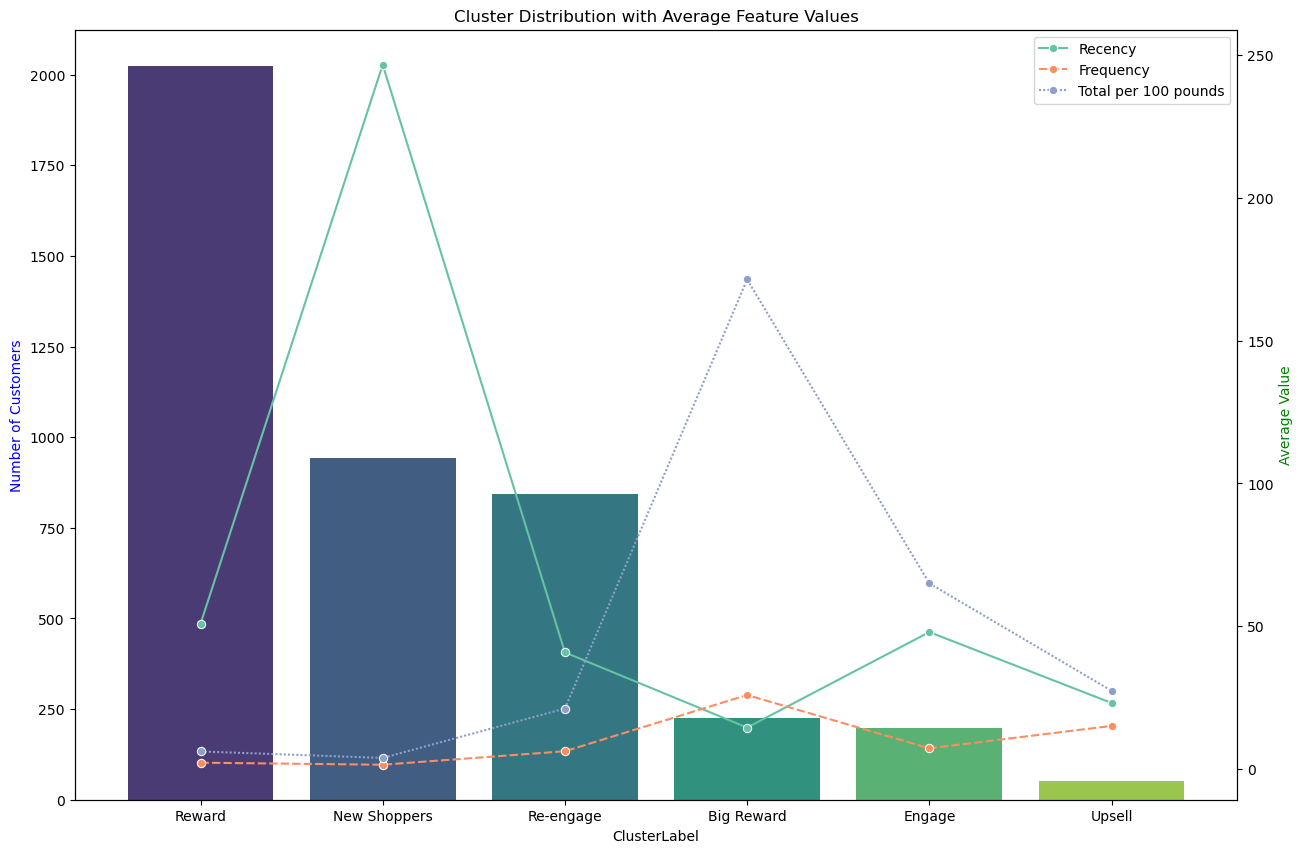

In [63]:
cluster_labels = {
    0: "New Shoppers",
    1: "Re-engage",
    2: "Reward",
    -1: "Engage",
    -2: "Upsell",
    -3: "Big Reward"
}

full_clustering_df = pd.concat([non_outliers, outlier_clusters_df])
full_clustering_df["ClusterLabel"] = full_clustering_df["Cluster"].map(cluster_labels)

cluster_counts = full_clustering_df['ClusterLabel'].value_counts()
full_clustering_df["Total per 100 pounds"] = full_clustering_df["Total"] / 100.00
feature_means = full_clustering_df.groupby('ClusterLabel')[['Recency', 'Frequency', 'Total per 100 pounds']].mean()

fig, ax1 = plt.subplots(figsize=(15, 10))

sns.barplot(x = cluster_counts.index, y = cluster_counts.values, ax = ax1, palette = 'viridis', hue = cluster_counts.index)
ax1.set_ylabel('Number of Customers', color = 'b')
ax1.set_title('Cluster Distribution with Average Feature Values')

ax2 = ax1.twinx()

sns.lineplot(data = feature_means, ax = ax2, palette = 'Set2', marker = 'o')
ax2.set_ylabel('Average Value', color = 'g')
plt.show()

## Considerations:
1. The majority of clients fall into the **"Reward"** category.  
2. As expected, the **"New Shoppers"** are those who have made recent purchases.  
3. The **"Delight"** clients are incredibly valuable, as they are the most frequent and highest-spending customers. Although their numbers are not significant, this can be advantageous, as a smaller group allows for more personalized and careful handling.  
4. The number of **"Re-engage"** (old) clients is similar to that of **"New Shoppers"**, indicating that action is needed to retain or recapture their interest.  
5. Since the number of **"Upsell"** clients is very small, investing in this group may not yield significant returns.  